# Stock-and-ETF-Prediction
Authors: Patrick Guo

Looking into a set of features that are based on market data to predict a stock is going to up or down stock price at least by +2% or -2% on next trading day.

Input features:
1. Daily price of a set of stock of OPEN, HIGH, LOW, CLOSE, (ADJ-CLOSE)
2. The key indexes: S&P 500, Nasdaq 100, Hang Seng Index,
3. may put additional features of technical indicators based on stock price

# Import Libraries and Load Data
[Stock CSVs on Google Drive](https://drive.google.com/file/d/1KJWGDK7rCGNb97JzJn4odw2EgVlyS350/view?usp=sharing)

In [39]:
import pandas as pd
import numpy as np
from datetime import datetime

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
myFmt = mdates.DateFormatter('%d')

# Preprocessing + Feature Selection
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

# Model Building
from sklearn.model_selection import train_test_split
import lightgbm as lgb

# Hyperparameter tuning 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Metrics
from sklearn.metrics import accuracy_score

In [41]:
path = "Sample Data/"
stock = pd.read_csv(path + "AAPL_.csv")
stock

date symbol    open    high     low   close        volume  \
0    2021-01-29 00:00:00   AAPL  135.83  136.74  130.21  131.96  2.356907e+10   
1    2021-01-28 00:00:00   AAPL  139.52  141.99  136.70  137.09  1.985112e+10   
2    2021-01-27 00:00:00   AAPL  143.43  144.30  140.41  142.06  2.008244e+10   
3    2021-01-26 00:00:00   AAPL  143.60  144.30  141.37  143.16  1.405457e+10   
4    2021-01-25 00:00:00   AAPL  143.07  145.09  136.54  142.92  2.248438e+10   
..                   ...    ...     ...     ...     ...     ...           ...   
195  2020-06-09 00:00:00   AAPL  332.14  345.61  332.01  343.99  1.260915e+10   
196  2020-06-08 00:00:00   AAPL  330.25  333.60  327.32  333.46  7.917189e+09   
197  2020-06-05 00:00:00   AAPL  323.35  331.75  323.23  331.50  1.042715e+10   
198  2020-06-04 00:00:00   AAPL  324.39  325.62  320.78  322.32  7.077746e+09   
199  2020-06-03 00:00:00   AAPL  324.66  326.20  322.30  325.12  8.472648e+09   

     turnover  preclose  risefall  risefallratio  
0           0    137.09     -5.13          -3.74  
1           0    142.06     -4.97          -3.50  
2           0    143.16     -1.10          -0.77  
3           0    142.92      0.24           0.17  
4           0    139.07      3.85           2.77  
..        ...       ...       ...            ...  
195         0    333.46     10.53           3.16  
196         0    331.50      1.96           0.59  
197         0    322.32      9.18           2.85  
198         0    325.12     -2.80          -0.86  
199         0    323.34      1.78           0.55  

[200 rows x 11 columns]

In [42]:
print("Dimensions:", stock.shape)

Dimensions: (200, 11)


In [43]:
company = stock["symbol"][0]
company

'AAPL'

In [61]:
stock['date']  = pd.to_datetime(stock['date'])
stock.set_index("date", inplace=True)

# EDA

In [62]:
# Summary Stats
stock.describe()

open       high         low       close        volume  turnover  \
count  200.000000  200.00000  200.000000  200.000000  2.000000e+02     200.0   
mean   206.251095  209.03587  203.339945  206.353525  1.625934e+10       0.0   
std    132.046944  133.65529  130.682837  132.550937  6.563588e+09       0.0   
min    104.540000  110.19000  103.100000  106.840000  5.455899e+09       0.0   
25%    116.200000  117.56500  114.130000  115.795000  1.166493e+10       0.0   
50%    124.355000  125.28500  121.530000  123.495000  1.480426e+10       0.0   
75%    351.907500  355.69000  349.687500  352.270000  1.956503e+10       0.0   
max    514.790000  515.14000  500.330000  506.090000  4.370332e+10       0.0   

        preclose    risefall  risefallratio  
count  200.00000  200.000000     200.000000  
mean   207.33655   -0.982950      -0.132900  
std    132.68429   26.857223       5.818932  
min    106.84000 -370.190000     -74.150000  
25%    115.81000   -1.770000      -1.207500  
50%    123.49500    0.212500       0.160000  
75%    352.27000    3.268750       1.700000  
max    506.09000   40.280000      10.470000

In [63]:
# General Info
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2021-01-29 to 2020-06-03
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   symbol         200 non-null    object 
 1   open           200 non-null    float64
 2   high           200 non-null    float64
 3   low            200 non-null    float64
 4   close          200 non-null    float64
 5   volume         200 non-null    float64
 6   turnover       200 non-null    int64  
 7   preclose       200 non-null    float64
 8   risefall       200 non-null    float64
 9   risefallratio  200 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 17.2+ KB


## Closing Price

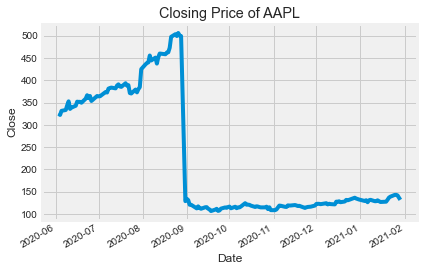

In [69]:
stock["close"].plot()
plt.ylabel("Close")
plt.xlabel("Date")
plt.title(f"Closing Price of {company}")
plt.show()

## Volume Traded

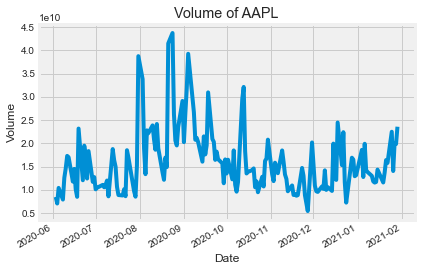

In [68]:
stock["volume"].plot()
plt.ylabel("Volume")
plt.xlabel("Date")
plt.title(f"Volume of {company}")
plt.show()